Importing necessary libraries

In [1]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Overview of Data

In [2]:
df = pd.read_csv('/content/heart.csv - heart.csv.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


All the datatypes are correct.

In [4]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Data Cleaning

In [5]:
df.isna().any()

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
restecg     False
thalachh    False
exng        False
oldpeak     False
slp         False
caa         False
thall       False
output      False
dtype: bool

No null values were found, checking for duplicates now

In [6]:
df.duplicated().any()

True

Duplicates were found, now we remove them and check if any still remains

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.duplicated().any()

False

MODEL BUILDING

removing the column to be predicted from X and storing it in y

In [9]:
X = df.drop(['output'], axis=1) 
y= df['output']

In [10]:
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [11]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 302, dtype: int64

Checking correlation of each column with each other and focusing on whether their correlation with the 'to be predicted column' or y is high (i.e < 0.5)

In [12]:
df.corr()>0.5

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,True,False,False,False,False,False,False,False,False,False,False,False,False,False
sex,False,True,False,False,False,False,False,False,False,False,False,False,False,False
cp,False,False,True,False,False,False,False,False,False,False,False,False,False,False
trtbps,False,False,False,True,False,False,False,False,False,False,False,False,False,False
chol,False,False,False,False,True,False,False,False,False,False,False,False,False,False
fbs,False,False,False,False,False,True,False,False,False,False,False,False,False,False
restecg,False,False,False,False,False,False,True,False,False,False,False,False,False,False
thalachh,False,False,False,False,False,False,False,True,False,False,False,False,False,False
exng,False,False,False,False,False,False,False,False,True,False,False,False,False,False
oldpeak,False,False,False,False,False,False,False,False,False,True,False,False,False,False


only y has a high correlation with itself which is obvious. Hence all columns are cleared to be included in model

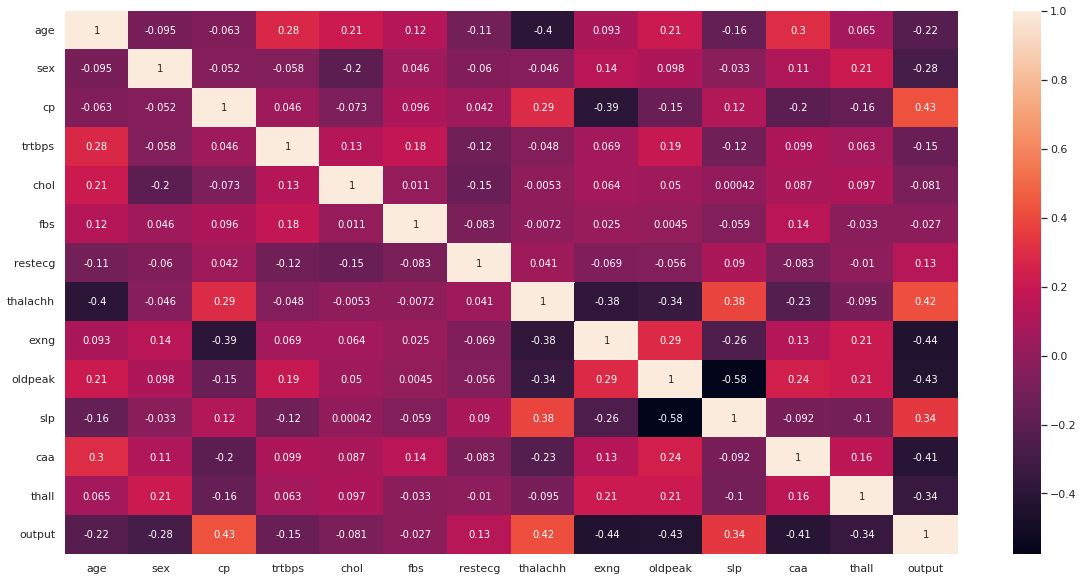

In [13]:
figure = plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True)

Using hold-out method to train the model by setting the random state and seeing score on different states

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8131868131868132

Fail to converge error which is possibly because of columns with binary data. Removing them repeating the above

In [16]:
X = df.drop(['output','sex','cp','fbs','restecg','exng','slp','caa','thall'], axis=1) 
X

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [18]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7142857142857143

The error is gone as the columns making the data too sparse and causing the fail to converge error are gone too, lets see the score on different random states and see how the score varies

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7032967032967034

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7582417582417582

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7472527472527473

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7802197802197802

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7582417582417582

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7142857142857143

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8241758241758241

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7362637362637363

Constructing a loop and appending the score values to a list.

In [27]:
pr_scores=[]
for x in range(43):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=x)
  lr = LogisticRegression()
  lr.fit(X_train, y_train)
  pr_scores.append(lr.score(X_test, y_test))
pr_scores

[0.7142857142857143,
 0.7032967032967034,
 0.7582417582417582,
 0.7472527472527473,
 0.7802197802197802,
 0.7582417582417582,
 0.7142857142857143,
 0.8241758241758241,
 0.7362637362637363,
 0.7472527472527473,
 0.6923076923076923,
 0.6923076923076923,
 0.7142857142857143,
 0.7032967032967034,
 0.7252747252747253,
 0.7692307692307693,
 0.6593406593406593,
 0.6593406593406593,
 0.8241758241758241,
 0.6703296703296703,
 0.7472527472527473,
 0.7472527472527473,
 0.7252747252747253,
 0.8021978021978022,
 0.7362637362637363,
 0.7472527472527473,
 0.6813186813186813,
 0.7252747252747253,
 0.6923076923076923,
 0.7802197802197802,
 0.6373626373626373,
 0.7142857142857143,
 0.8021978021978022,
 0.6483516483516484,
 0.7802197802197802,
 0.7032967032967034,
 0.7362637362637363,
 0.7252747252747253,
 0.7362637362637363,
 0.7252747252747253,
 0.7472527472527473,
 0.7362637362637363,
 0.7582417582417582]

In [28]:
min(pr_scores)

0.6373626373626373

In [29]:
max(pr_scores)

0.8241758241758241

as we can see the values of score ranges from 63% to 82% for different random states. On average this model is performing good as most of the values actually lie in the 70s and only a handful in 60s.

In [30]:
sum(pr_scores)/len(pr_scores)

0.7308970099667778

The average score out of 43 observation is 73% 
Lets get more insight by confusion matrix

In [31]:
pred = lr.predict(X_test)

In [32]:
cm = confusion_matrix(y_test, pred)
print(cm)

[[29 13]
 [ 9 40]]


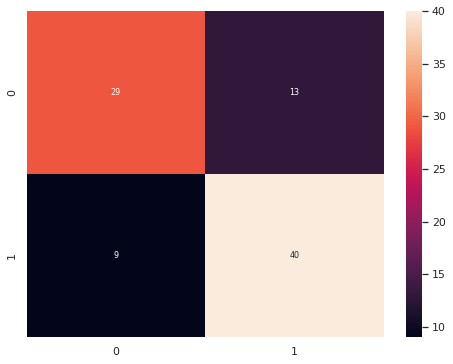

In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, annot_kws={"size": 8})
plt.show()

This tells us that our model has a higher chance of predicting a false positive, meaning falsely declaring someone a heat patient and less likely to declare someone healthy when they are a heart patient

Scaling the data using Standard Scalar which uses Gaussian Distribution for a better prediction. Repeating the above process.

In [52]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
pr_scores_scaled = []
for x in range(43):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=x)
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  lr1 = LogisticRegression()
  lr1.fit(X_train_scaled, y_train)
  pr_scores_scaled.append(lr1.score(X_test_scaled, y_test))
pr_scores_scaled

[0.7142857142857143,
 0.7032967032967034,
 0.7582417582417582,
 0.7472527472527473,
 0.7802197802197802,
 0.7692307692307693,
 0.7142857142857143,
 0.8241758241758241,
 0.7362637362637363,
 0.7472527472527473,
 0.6923076923076923,
 0.7032967032967034,
 0.7142857142857143,
 0.7032967032967034,
 0.7252747252747253,
 0.7692307692307693,
 0.6483516483516484,
 0.6593406593406593,
 0.8241758241758241,
 0.6703296703296703,
 0.7472527472527473,
 0.7472527472527473,
 0.7252747252747253,
 0.8021978021978022,
 0.7472527472527473,
 0.7362637362637363,
 0.6813186813186813,
 0.7252747252747253,
 0.6923076923076923,
 0.7802197802197802,
 0.6483516483516484,
 0.7142857142857143,
 0.7912087912087912,
 0.6483516483516484,
 0.7692307692307693,
 0.7032967032967034,
 0.7252747252747253,
 0.7252747252747253,
 0.7252747252747253,
 0.7142857142857143,
 0.7362637362637363,
 0.7582417582417582,
 0.7582417582417582]

In [59]:
min(pr_scores_scaled)

0.6483516483516484

In [60]:
max(pr_scores_scaled)

0.8241758241758241

In [61]:
sum(pr_scores_scaled)/len(pr_scores_scaled)

0.7303858931765912

After Scaling, the prediction score is found to be almost the same but the lowest score is up by around 1% 

In [65]:
pred1 = lr1.predict(X_test_scaled)

In [66]:
cm1 = confusion_matrix(y_test, pred1)
print(cm1)

[[29 13]
 [ 9 40]]


The confusion matrix appears to be the same